# Compare to alternative models

In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow, BayesRegression, LMERegression, BayesConditions

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

## Bayesian

changing x to neuron:Q


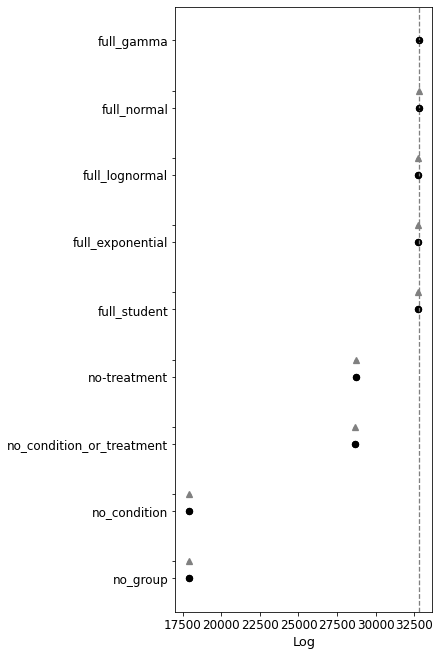

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_gamma,0,32800.181061,10.148326,0.000000,0.209874,80.148924,0.000000,False,log
full_normal,1,32797.850706,10.180607,2.330356,0.218620,82.822100,116.055187,False,log
full_lognormal,2,32740.708914,10.207770,59.472147,0.190389,81.804631,114.696236,False,log
full_exponential,3,32733.663128,10.253747,66.517933,0.198490,84.786284,117.216321,False,log
full_student,4,32723.879080,10.244597,76.301981,0.186213,83.032600,115.757964,False,log
no-treatment,5,28711.612359,1.901973,4088.568702,0.000441,72.408996,108.084748,False,log
no_condition_or_treatment,6,28637.277782,1.893751,4162.903279,0.000437,73.918917,108.777673,False,log
no_condition,7,17918.105834,0.719995,14882.075227,0.000001,58.119435,98.603778,False,log
no_group,8,17885.822620,0.755735,14914.358441,0.000000,58.333399,99.509256,False,log


In [3]:
window = BayesRegression(df=df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

## Linear mixed effects model

In [4]:
window = LMERegression(df=df, y='isi', treatment='stim', group='mouse', condition='neuron_x_mouse')
window.fit()
window.fit_anova()
window.posterior

Using formula isi ~ (1|mouse) + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17 + stim|neuron_x_mouse__18 + stim|neuron_x_mouse__19 + stim|neuron_x_mouse__20 + stim|neuron_x_mouse__21 + stim|neuron_x_mouse__22 + stim|neuron_x_mouse__23 + stim|neuron_x_mouse__24 + stim|neuron_x_mouse__25 + stim|neuron_x_mouse__26 + stim|neuron_x_mouse__27 + stim|neuron_x_mouse__28 + stim|neuron_x_mouse__29 + stim|neuron_x_mouse__30 + stim|neuron_x_mouse__31 + stim|neuron_x_mouse__32 + stim|neuron_x_mouse__33 + stim|neuron_x_mouse__34 + stim|neuron_x_mouse__35 + stim|neuron_x_mouse__36 + stim|neuron_x_m

/home/m/anaconda3/envs/dj/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                            Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept                   0.081    0.004   22.294  0.000   0.074   0.088
1 | mouse                  -0.004    0.001   -4.534  0.000  -0.005  -0.002
stim | neuron_x_mouse__0   -0.003    0.001   -3.975  0.000  -0.005  -0.002
stim | neuron_x_mouse__1   -0.006    0.001   -7.787  0.000  -0.008  -0.005
stim | neuron_x_mouse__2   -0.012    0.001  -14.526  0.000  -0.014  -0.010
...                           ...      ...      ...    ...     ...     ...
stim | neuron_x_mouse__76   0.003    0.001    3.363  0.001   0.001   0.004
stim | neuron_x_mouse__77  -0.001    0.001   -0.997  0.319  -0.002   0.001
stim | neuron_x_mouse__78  -0.004    0.001   -4.513  0.000  -0.005  -0.002
stim | neuron_x_mouse__79  -0.007    0.001   -8.200  0.000  -0.008  -0.005
Group Var                   0.000    0.002                                

[83 rows x 6 columns]
changing x to :Q
isi~stim
           sum_sq    df      F  PR(>F)
stim        

AttributeError: 'LMERegression' object has no attribute 'posterior'

In [6]:
window.plot(x='neuron_x_mouse')

alt.LayerChart(...)

Simple one-way ANOVA:

In [7]:
window.fit_anova()

isi~stim
           sum_sq    df      F  PR(>F)
stim         0.0   1.0  52.91     0.0
Residual     0.0  14.0    NaN     NaN


True

Of course in reality, neurons don't have this consistent variation in each mouse. This would only be applicable to a priori classes of neurons